# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'] 
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int) # was object, change to str
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df

C:\Users\liyan\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [4]:
clean_hospital_read_df['Number of Discharges'][81:-3]
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]] # a list
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3]) # with no index


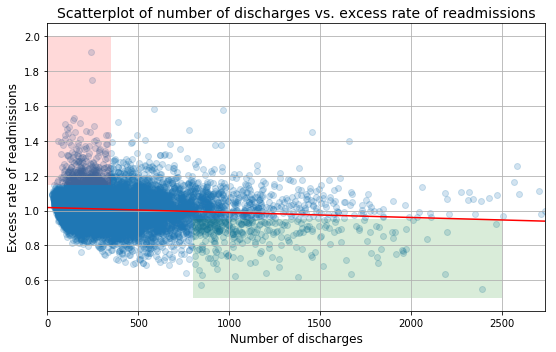

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
# The fisrt 81 rows and the last 3 rows were deleted.

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(8,5)) # size of the figure has been changed.
ax.scatter(x, y,alpha=0.2)

a, b = np.polyfit(x,y,1)
c = np.array([0, 3000])
d = a * c + b
plt.plot(c,d, color='red')


ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
data = pd.DataFrame(list(zip(x, y)), columns=['x','y'])
a, b = np.polyfit(data.x,data.y,1)
print('slope =', a)
print('intercept =', b)
# Due to negative slope, overall, rate of readmissions is trending down with increasing number of discharges

slope = -2.8565052943821946e-05
intercept = 1.0179475579544202


In [7]:
data = pd.DataFrame(list(zip(x, y)), columns=['x','y'])
data = data[data.x<=350]

a, b = np.polyfit(data.x,data.y,1)

print('slope =', a)
print('intercept =', b)
# Due to the negative slope, With lower number of discharges, the rate of readmissions tend to increase, but not much because
#the slope is close to zero (#area shaded red)

slope = -4.577461312241421e-05
intercept = 1.02194755349489


In [8]:
data = pd.DataFrame(list(zip(x, y)), columns=['x','y'])
data = data[data.x > 800]
data = data[data.x < 2500]

a, b = np.polyfit(data.x,data.y,1)

print('slope =', a)
print('intercept =', b)
# Due to the negative slope, with higher number of discharges, there is a greater incidence of lower rates of readmissions 
#(area shaded green)

slope = -3.295669488070656e-05
intercept = 1.021972959654154


In [41]:
# In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess 
#readmission rate greater than 1.
#Hyphothesis1: the mean of readmission rate with number of discharges < 100 is 1.023
#Hyphothesis2: there is excess admission greater than 1.
data = pd.DataFrame(list(zip(x, y)), columns=['x','y'])
data = data[data.x <100]


def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size): # draw bootstrap replicates
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates    

bs_replicates = draw_bs_reps(data.y, np.mean, size=1000)
p=np.sum(bs_replicates>=1.023)/1000
p2=np.sum(bs_replicates>=1)/1000
print('p = ', p)
print('p2 = ', p2)

# p=0.406 > 0.01, hence the readmission rate with number of discharges <100 is 1.023, which indicates an excess readmission.
# p=1 means 100% of all the capcacity <100 have excess readmissions.

p =  0.388
p2 =  1.0


In [10]:
# In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess 
#readmission rate greater than 1
#Hyphothesis1: the mean of readmission rate with number of discharges < 1000 is 0.978
#Hyphothesis2: there is excess admission greater than 1.
data = pd.DataFrame(list(zip(x, y)), columns=['x','y'])
data = data[data.x > 1000]

bs_replicates = draw_bs_reps(data.y, np.mean, size=10000)
p=np.sum(bs_replicates>=0.978)/10000
p2=np.sum(bs_replicates>1)/10000
print('p = ', p)
print('p2 = ', p2)
# p=0.5703 > 0.01, hence the readmission rate with number of discharges >100 is 0.978.
# p2=0.0001 > 0.01, hence the hyphothesis#2 is rejected, readmission rate is not likely to be greater than 1.

p =  0.58
p2 =  0.0


In [11]:
#There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

def pearson_r(x, y): # Compute Pearson correlation coefficient between two arrays
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
r= pearson_r(x,y)
r
#Due to the negative r value, there is a significant negative correlation between hospital capacity (number of discharges) 
#and readmission rates.•	Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent 
#complications that lead to readmissions.

-0.09309554287590442

In [52]:
data = pd.DataFrame(list(zip(x, y)), columns=['x','y'])
data = data[data.x <300]


def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size): # draw bootstrap replicates
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates    

bs_replicates = draw_bs_reps(data.y, np.mean, size=1000)
p=np.sum(bs_replicates>=1)/1000
print('p = ', p)
#•Hospitals/facilties with small capacity (< 300) should be required 
#to demonstrate upgraded resource allocation for quality care to continue operation.

p =  1.0
